In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# generating some data
x = 10 * np.random.rand(50) #some independent data
y = 3 * x - 8 + np.random.randn(50) * 4 #establishing a clear function such as 
# y = 2x - 5 + (random_number) * 4
# basically playing god
random_number_reproduced = np.random.randn(50)[0]

x[0], y[0]
x.shape, y.shape

((50,), (50,))

This is because scikit-learn's LinearRegression model expects the input x to be a 2D array but doesn't require y to be reshaped.

In [3]:
# Fit a Linear regression model
x = x.reshape(-1,1)

model = LinearRegression()
model.fit(x,y) # fit a regression model



LinearRegression()

In [4]:
y_pred = model.predict(x) # calculate the predited values

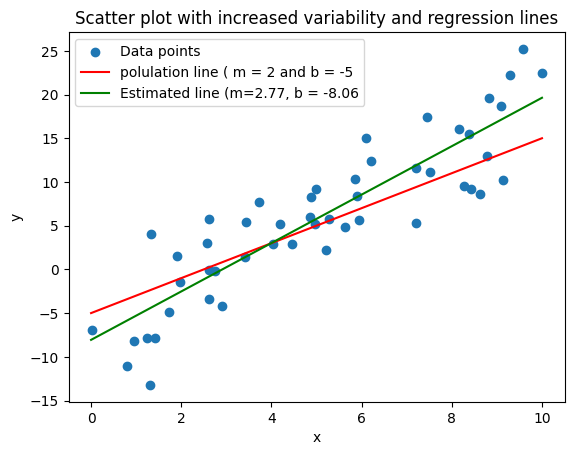

In [5]:
# Plot the scatter plot and regression lines
plt.scatter(x,y,label = "Data points")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter plot with increased variability and regression lines")

# plot the actual popluation line
x_line = np.linspace(0,10,100) #Return evenly spaced numbers over a specified interval.
y_actual = 2* x_line - 5
plt.plot(x_line,y_actual,'r',label = "polulation line ( m = 2 and b = -5")

# plot the estimated regression line
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line,y_estimated,'g',label = f"Estimated line (m={model.coef_[0]:.2f}, b = {model.intercept_:.2f}")

plt.legend()
plt.show()

### Linear Regression Analysis

#### HighLevel Overview of Regression Analysis

In [19]:
import pandas as pd
import statsmodels.api as sm # help to perform linear regression -> but gives a detailed analysis

url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col = 0)

X = data[['TV','Radio','Newspaper']]
y = data['Sales']

X = sm.add_constant(X) # adding a constant for the intercept

# Fit the model using the independent and the dependent variables
model = sm.OLS(y,X).fit()





In [20]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [21]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        03:17:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

### Now lets understand what each part of the above summary means

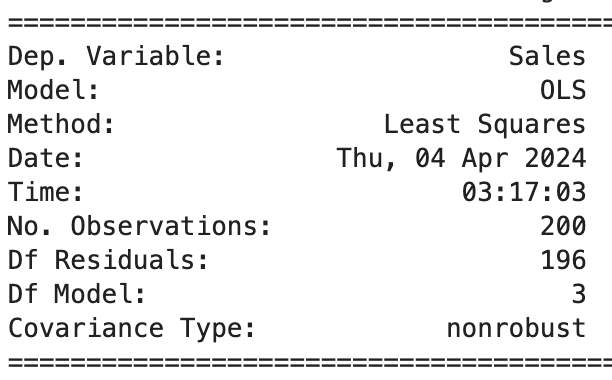

        This part of the summary represents the metadata, basically data about our data.

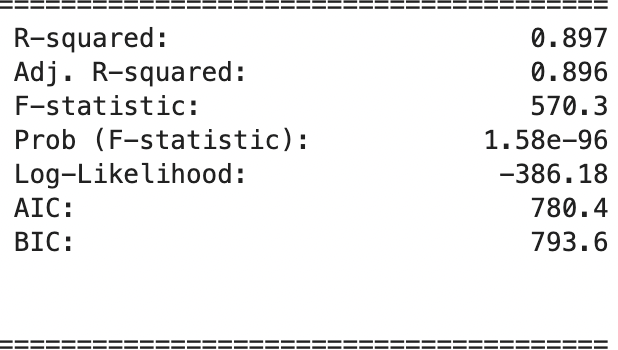

This is the main part, exists to explain the relationship between X and y.Can be also called as Goodness of fit.

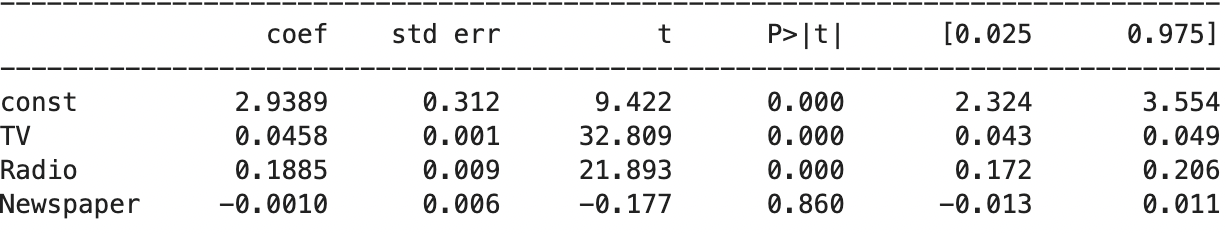

Shows the values of your coefficients along with the individual relationship between each component of X and y.

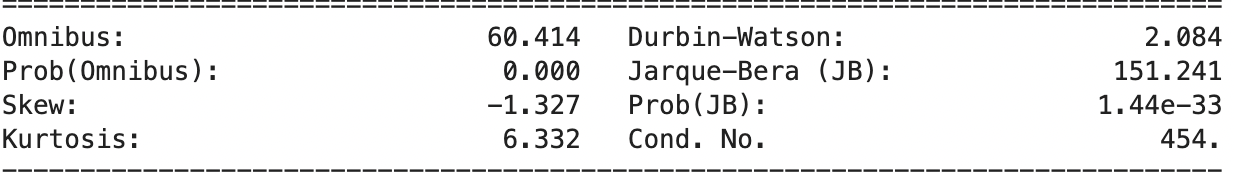

This exists to test the assumptions of Linear Regression.

### Goodness of Fit

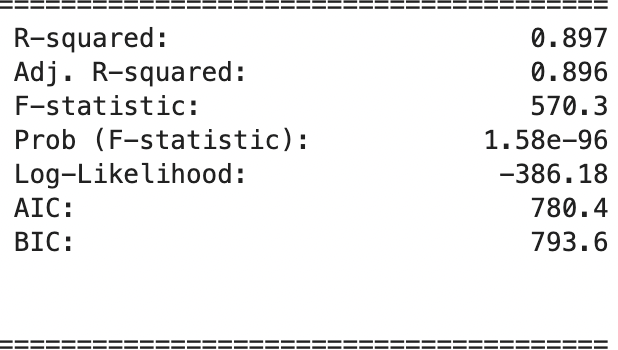

* F-stastistics or prob (F-stastistics) : tells you if there is at all any relationship between X and y.
    * Here a hypthesis test is done called `f-test` for overall significance, closely related to Annova.
    * TSS, RSS and ESS these concepts needed to understand f-test (present in Regression Analysis Notes) also Degree of Freedom.

In [26]:
# In Python
from scipy.stats import f

F_statistic = 570.3  # Replace with your F-statistic value
df1 = 3  # Replace with your df1 value
df2 = 196  # Replace with your df2 value

p_value = 1 - f.cdf(F_statistic, df1, df2)
p_value

1.1102230246251565e-16

In [29]:
 from scipy.stats import f

# F-statistic value
f_statistic = 570.3

# Degrees of freedom
df1 = 3  # Number of predictors (TV, Radio, Newspaper)
df2 = 196  # Total number of observations - number of parameters estimated

# Calculate p-value
p_value = f.sf(f_statistic, df1, df2)

# Significance level (alpha)
alpha = 0.05  # You can change this value as needed

# Check if p-value is less than alpha
if p_value < alpha:
    print("The p-value is less than the significance level.")
    print("There is evidence to reject the null hypothesis.")
else:
    print("The p-value is greater than or equal to the significance level.")
    print("There is not enough evidence to reject the null hypothesis.")


The p-value is less than the significance level.
There is evidence to reject the null hypothesis.


In [30]:
p_value

1.568132212785321e-96